In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('diabetes.csv')

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 1440x720 with 0 Axes>

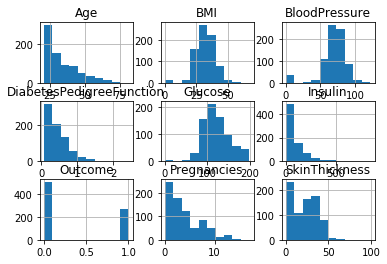

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
data.hist()
plt.show()

C:\Users\GeetaKumari\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


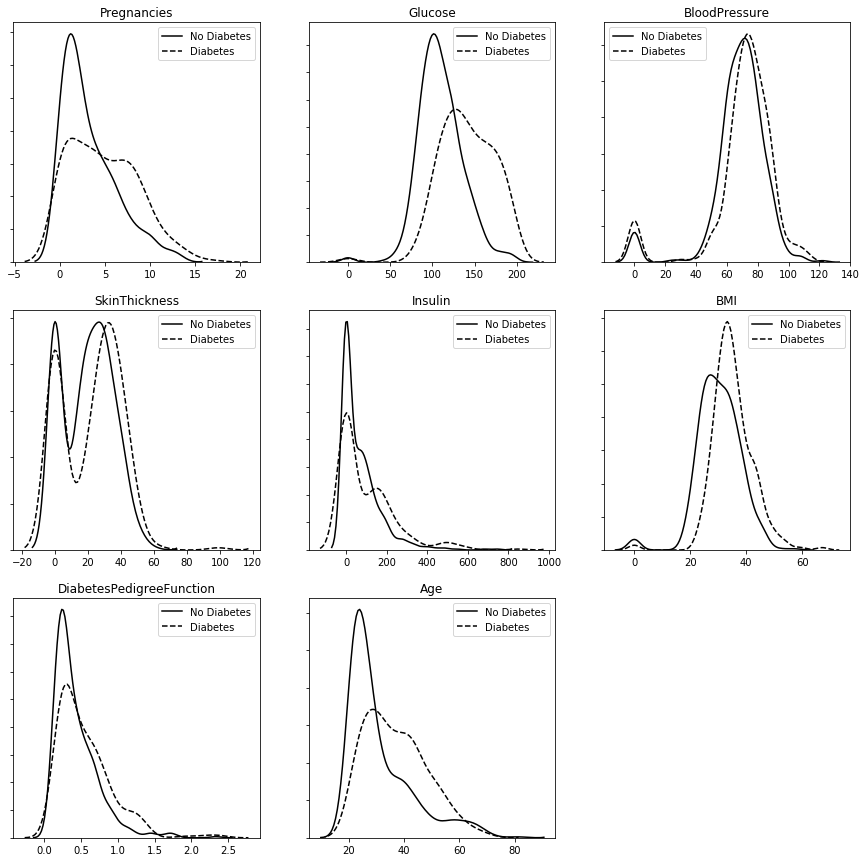

In [41]:
import seaborn as sns

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(data.loc[data.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(data.loc[data.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

In [42]:
print(data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [43]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df=data.drop(['Outcome'],axis=1)

In [45]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [46]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [47]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [48]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [49]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)

In [50]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [51]:
df_scaled['Outcome'] = data['Outcome']
df = df_scaled

In [52]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [53]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [54]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [57]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [59]:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))

In [60]:
# Add the second hidden layer
model.add(Dense(16, activation='relu'))

In [61]:
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
491/491 [==============================] - 1s 2ms/step - loss: 0.7652 - accuracy: 0.3788
Epoch 2/200
491/491 [==============================] - 0s 89us/step - loss: 0.6737 - accuracy: 0.5825
Epoch 3/200
491/491 [==============================] - 0s 89us/step - loss: 0.6181 - accuracy: 0.7088
Epoch 4/200
491/491 [==============================] - 0s 75us/step - loss: 0.5753 - accuracy: 0.7271
Epoch 5/200
491/491 [==============================] - 0s 75us/step - loss: 0.5393 - accuracy: 0.7393
Epoch 6/200
491/491 [==============================] - 0s 104us/step - loss: 0.5105 - accuracy: 0.7556
Epoch 7/200
491/491 [==============================] - 0s 103us/step - loss: 0.4898 - accuracy: 0.7678
Epoch 8/200
491/491 [==============================] - 0s 101us/step - loss: 0.4740 - accuracy: 0.7699
Epoch 9/200
491/491 [==============================] - 0s 106us/step - loss: 0.4633 - accuracy: 0.7760
Epoch 10/200
491/491 [==============================] - 0s 108us/step - loss: 0

491/491 [==============================] - 0s 131us/step - loss: 0.3350 - accuracy: 0.8493
Epoch 81/200
491/491 [==============================] - 0s 117us/step - loss: 0.3335 - accuracy: 0.8493
Epoch 82/200
491/491 [==============================] - 0s 111us/step - loss: 0.3324 - accuracy: 0.8493
Epoch 83/200
491/491 [==============================] - 0s 110us/step - loss: 0.3306 - accuracy: 0.8513
Epoch 84/200
491/491 [==============================] - 0s 98us/step - loss: 0.3288 - accuracy: 0.8452
Epoch 85/200
491/491 [==============================] - 0s 102us/step - loss: 0.3284 - accuracy: 0.8534
Epoch 86/200
491/491 [==============================] - 0s 100us/step - loss: 0.3261 - accuracy: 0.8534
Epoch 87/200
491/491 [==============================] - 0s 96us/step - loss: 0.3245 - accuracy: 0.8554
Epoch 88/200
491/491 [==============================] - 0s 98us/step - loss: 0.3240 - accuracy: 0.8595
Epoch 89/200
491/491 [==============================] - 0s 114us/step - loss: 0.

491/491 [==============================] - 0s 118us/step - loss: 0.2385 - accuracy: 0.9043
Epoch 159/200
491/491 [==============================] - 0s 120us/step - loss: 0.2367 - accuracy: 0.9084
Epoch 160/200
491/491 [==============================] - 0s 115us/step - loss: 0.2362 - accuracy: 0.9084
Epoch 161/200
491/491 [==============================] - 0s 97us/step - loss: 0.2352 - accuracy: 0.9084
Epoch 162/200
491/491 [==============================] - 0s 89us/step - loss: 0.2338 - accuracy: 0.9124
Epoch 163/200
491/491 [==============================] - 0s 128us/step - loss: 0.2318 - accuracy: 0.9124
Epoch 164/200
491/491 [==============================] - 0s 109us/step - loss: 0.2314 - accuracy: 0.9165
Epoch 165/200
491/491 [==============================] - 0s 103us/step - loss: 0.2300 - accuracy: 0.9145
Epoch 166/200
491/491 [==============================] - 0s 109us/step - loss: 0.2297 - accuracy: 0.9145
Epoch 167/200
491/491 [==============================] - 0s 105us/step 

In [64]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 0s 280us/step
Training Accuracy: 93.08%

154/154 [==============================] - 0s 44us/step
Testing Accuracy: 78.57%



Text(33.0, 0.5, 'Actual')

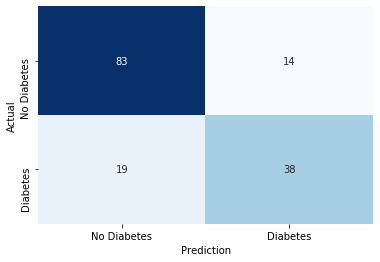

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [66]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)

In [67]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

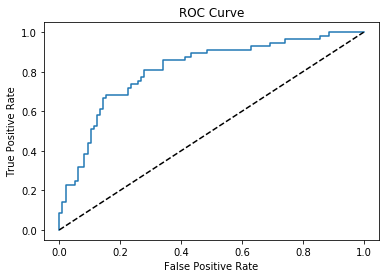

In [68]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')